In [1]:
import sys
import stmpy
import numpy as np
import cancelv3 as cancel
from decimal import *
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle
import pathlib
from sklearn.externals import joblib

import datetime
import scipy.fftpack as fftp
import os

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
folder_name = "../STMDATA/2019-02-26/"
file_name="topo_4-"
x=1
%reset_selective -f dat
dat=loadtxt(folder_name+file_name+str(x).zfill(3)+".dat",skiprows=6)
for x in arange(2,331):
    print(x)
    dat=concatenate((dat,loadtxt(folder_name+file_name+str(x).zfill(3)+".dat",skiprows=6)))
save(folder_name+"topo_4",dat)

In [ ]:
folder_name = "../STMDATA/2019-02-25/"
file_name="noisy-trx2.npy"
%reset_selective -f dat
dat=load(folder_name+file_name)

In [ ]:
z=dat[:400000,1]
geo=dat[:400000,0]
nc=cancel.Cancel(geo,z,1/10000)
%reset_selective -f dat

In [ ]:
filename = "noisy_topo_3_10khz-001.dat"
test =loadtxt(folder_name+filename,skiprows=6)
t_z = test[19500:,5]
t_geo = test[19500:,1]
%reset_selective -f test

In [ ]:
nc.optimize(geo,z,t_geo,t_z,1/10000)

In [ ]:
# load data

file_name = "trx_2-"
data_lim = 25000
folder_name = "../STMDATA/2019-02-26/"
# i = 1
# dat = np.loadtxt(folder_name+file_name+str(i).zfill(3)+".dat", skiprows=6)
# for i in arange(2,1000):
#     print(i)
#     dat = concatenate((dat,loadtxt(folder_name+file_name+"%(number)03d"%{"number": i}+".dat", skiprows=6)))
# save(folder_name+"trx_2",dat)

dat=load(folder_name+"trx_2.npy")
geo=dat[:,0]
z=dat[:,1]

In [ ]:
nc = cancel.Cancel(geo-mean(geo),z,(1/10000),p=[200000,125000,5])

In [ ]:
filename = '../STMDATA/2019-02-26/trx_2'
joblib.dump([nc.transf, nc.freqs], filename)  

In [ ]:
# plot(z[::10000])
loglog(nc.freqs,abs(nc.transf(nc.freqs)))
xlim(1,300)

In [ ]:
semilogx(nc.freqs,angle(nc.transf(nc.freqs)))
xlim(50,70)

In [ ]:
# plot(z[::10000])
plot(nc.freqs,angle(nc.transf(nc.freqs)))
xlim(1,100)

In [ ]:
start = 1000000
r = 500000

avg = 100
# plot(sum(z[start:start+r].reshape(-1,avg),axis=1)/avg)
plot(sum(geo[start:start+r].reshape(-1,avg),axis=1)/avg)

In [ ]:
# load data

file_name = "noisy-transferfxn2-"
data_lim = 25000
folder_name = "../STMDATA/2019-02-21/"
i = 1
# dat = np.loadtxt(folder_name+file_name+str(i).zfill(3)+".dat", skiprows=6)
# for i in arange(2,1000):
#     dat = concatenate((dat,loadtxt(folder_name+file_name+"%(number)03d"%{"number": i}+".dat", skiprows=6)))
# save(folder_name+"fast-transfer-function",dat)
# l = 15000000
dat=load(folder_name+"fast-transfer-function.npy")
geo_cal=dat[:,0]
z_cal=dat[:,1]
# t = linspace(0,l,l)
# fit = polyfit(t,z,2)
# z_offset=z-(fit[0]*(t**2)+t*fit[1]+fit[2])
# scan_freq=10000
# nc = cancel.Cancel(geo-mean(geo),z_offset,(1/scan_freq),p=[100000,25000,5])

In [ ]:
# plot(geo_cal[:1000])
plot(z_cal[:1000])
std(z_cal[:1000])

In [ ]:
scan_freq=10000
plot(z_cal[:1000]-create_drive(geo_cal[:1000]-mean(geo_cal[:1000]),1/scan_freq,transf,freqs))

std(z_cal[:1000]-create_drive(geo_cal[:1000]-mean(geo_cal[:1000]),1/scan_freq,transf,freqs))

In [ ]:
plot(z[1000:2000],'x')
# plot(geo[:1000],'x')
plot((z-create_drive(geo-mean(geo),1/scan_freq,transf,freqs))[1000:2000])

In [ ]:
scan_freq=10000
nc = cancel.Cancel(geo-mean(geo),z,(1/scan_freq),p=[200000,50000,5])

filename = '../STMDATA/2019-01-26/noisy-transferfxn2'
joblib.dump([nc.transf, nc.freqs], filename)  

In [ ]:
plot(freqs,angle(transf(freqs)))
xlim(0,300)
# xlim(40,70)

In [ ]:
# load data

file_name = "topo_4-"
dd = 26
mm = 2
yyyy = 2019
data_lim = 25000
date_string = "{0:0=4d}".format(yyyy) + "-" + "{0:0=2d}".format(mm) + "-" + "{0:0=2d}".format(dd)
folder_name = "../STMDATA/"+date_string+"/"

In [ ]:
i = 1
temp_data = np.loadtxt(folder_name+file_name+"%(number)03d"%{"number": i}+".dat", skiprows=6)
# os.remove(folder_name+date_string+file_name+"%(number)03d"%{"number": i}+".dat")
while True:
    i += 1
    try:
        temp_data = np.concatenate((temp_data, np.loadtxt(folder_name+file_name+"%(number)03d"%{"number": i}+".dat", skiprows=6)))
        # os.remove(folder_name+date_string+file_name+"%(number)03d"%{"number": i}+".dat")
    except:
        break

In [ ]:
temp_data=temp_data[np.where(temp_data[:-1,1] != temp_data[1:,1])[0][0]:np.where(temp_data[:-1,1] != temp_data[1:,1])[0][-1]]

In [ ]:
z_t = temp_data[:,3]
y_t = temp_data[:,2]
x_t = temp_data[:,1]
geo_t = temp_data[:,0]
%reset_selective -f temp_data

In [ ]:
ang=109.4*pi/180

# geo = create_drive(geo_t, 1/10000, transf,freqs)
x = math.cos(ang)*x_t-math.sin(ang)*y_t
y = math.sin(ang)*x_t+math.cos(ang)*y_t
z = z_t

In [ ]:
geo = create_drive(geo_t, 1/10000, transf,freqs)

In [ ]:
filename = '../STMDATA/2019-02-26/topo_4_int'
joblib.dump([x,y,z,geo], filename)  

In [2]:
def create_drive(zdata, dt2, tf, freqs):
    fbottom2 = np.fft.fft(zdata)
    freq2 = np.fft.fftfreq(len(zdata),dt2)
    freq2[freq2 > freqs[np.argmax(freqs)]] = freqs[np.argmax(freqs)]
    freq2[freq2 < freqs[np.argmin(freqs)]] = freqs[np.argmin(freqs)]
    driver = np.fft.ifft(tf(freq2)*fbottom2)
    return driver

[transf, freqs] = joblib.load('../STMDATA/2019-02-26/trx_2')

In [3]:
[x,y,z,geo]=joblib.load('../STMDATA/2019-02-26/topo_4_int')

In [4]:
# scan parameters
scan_freq = 10000 # S/s
x_min = Decimal(x.min())
# x_max = Decimal(x.max()*1.01)
x_max = Decimal(x.max())
y_min = Decimal(y.min())
# y_max = Decimal(y.max()*1.01)
y_max = Decimal(y.max())
img_w = 256 # px/line
img_h = 256
img_wm = 10e-9 # m/line
img_hm = 10e-9

In [5]:

xrange = x_max-x_min
y_range = y_max-y_min

pixel_dx = xrange / (img_w)
pixel_dy = xrange / (img_h)

dx = np.gradient(x)

# empty arrays for output
fr_scan = np.empty((img_w,img_h), dtype=object)
bk_scan = np.empty((img_w,img_h), dtype=object)

cn_fr_scan = np.empty((img_w,img_h), dtype=object)
cn_bk_scan = np.empty((img_w,img_h), dtype=object)

for idx, el in enumerate(z):
#     print(idx)
    ix = int((Decimal(x[idx]) - x_min) // pixel_dx)
    iy = int((Decimal(y[idx]) - y_min) // pixel_dy)
    # if ix > 255 or iy > 255: print(ix, iy, el[1], el[2])
    if ix >= img_w: ix = img_w-1
    if iy >= img_h: iy = img_h-1
#     print(ix)
#     print(iy)
    if dx[idx] > 0:
#         print(fr_scan[ix,iy])
        if fr_scan[ix,iy] == None: fr_scan[ix,iy] = [el]
        else: fr_scan[ix,iy].append(el)
        if cn_fr_scan[ix,iy] == None: cn_fr_scan[ix,iy] = [geo[idx]]
        else: cn_fr_scan[ix,iy].append(geo[idx])
    else:
#         print(bk_scan[ix,iy])
        if bk_scan[ix,iy] == None: bk_scan[ix,iy] = [el]
        else: bk_scan[ix,iy].append(el)
        if cn_bk_scan[ix,iy] == None: cn_bk_scan[ix,iy] = [geo[idx]]
        else: cn_bk_scan[ix,iy].append(geo[idx])

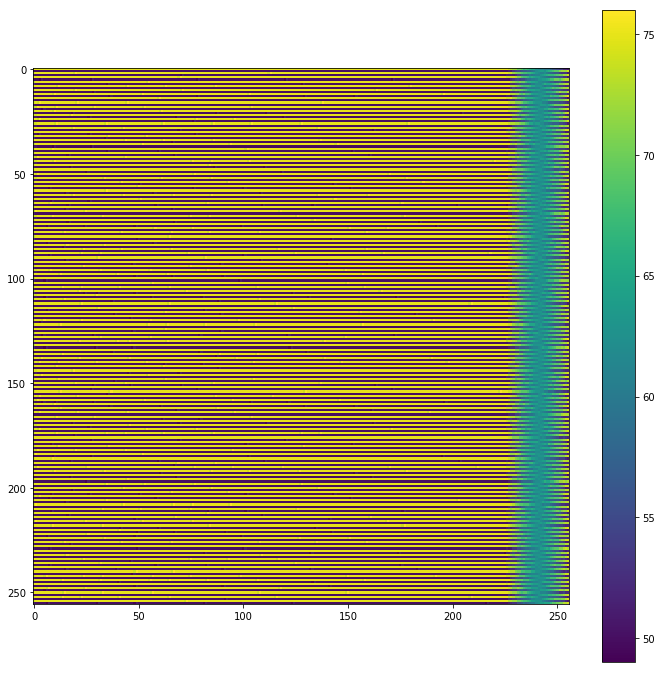

In [6]:
dat_size=np.zeros((img_w,img_h))

for yi, row in enumerate(fr_scan):
    for xi, l in enumerate(row):
        if l != None: dat_size[-xi,yi] = size(np.array(l))
        else: dat_size[-xi, yi] = 0
            
figsize(12,12)
imshow(dat_size)
colorbar()

In [7]:
raw=np.zeros((img_w,img_h))
output=np.zeros((img_w,img_h))

filler=[]

for yi, row in enumerate(fr_scan):
    for xi, l in enumerate(row):
        if l != None: raw[-xi,yi] = np.mean(np.array(l))
#         else: output[-xi, yi] = np.mean(z)
        else:
            print((xi,yi))
            filler.append((-int(xi),int(yi)))
        
for xi,yi in filler:
    print(np.mean((raw[xi-1,yi],raw[xi+1,yi],raw[xi,yi-1],raw[xi,yi+1])))
    raw[xi,yi] = np.mean((raw[xi-1,yi],raw[xi+1,yi],raw[xi,yi-1],raw[xi,yi+1]))
            
for yi, row in enumerate(cn_fr_scan):
    for xi, l in enumerate(row):
        if l != None: output[-xi,yi] = raw[-xi, yi]-np.mean(np.array(l))
#         else: output[-xi, yi] = np.mean(z)
        else: output[-xi, yi] = raw[-xi,yi]
            
# output_rev=np.zeros((img_w,img_h))
# processed_rev=np.zeros((img_w,img_h))

# for yi, row in enumerate(bk_scan):
#     for xi, l in enumerate(row):
#         if l != None: output_rev[-xi,yi] = np.mean(np.array(l))
#         else: output_rev[-xi, yi] = np.mean(z)

C:\Users\Albert Chien\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


C:\Users\Albert Chien\AppData\Roaming\Python\Python36\site-packages\matplotlib\font_manager.py:1238: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


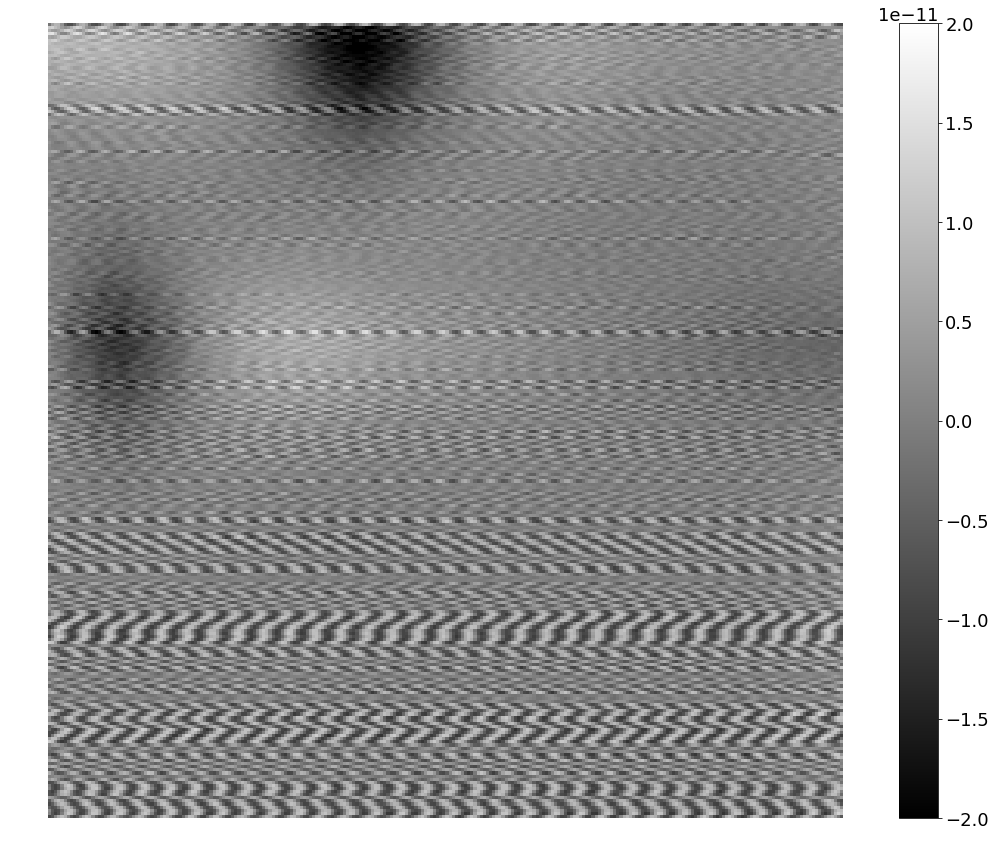

In [8]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

figsize(16,12)
plt.imshow(stmpy.tools.lineSubtract(raw), rasterized=True, vmin=-2e-11, vmax=2e-11)
plt.tight_layout()
plt.gray()
axis('off')
colorbar()

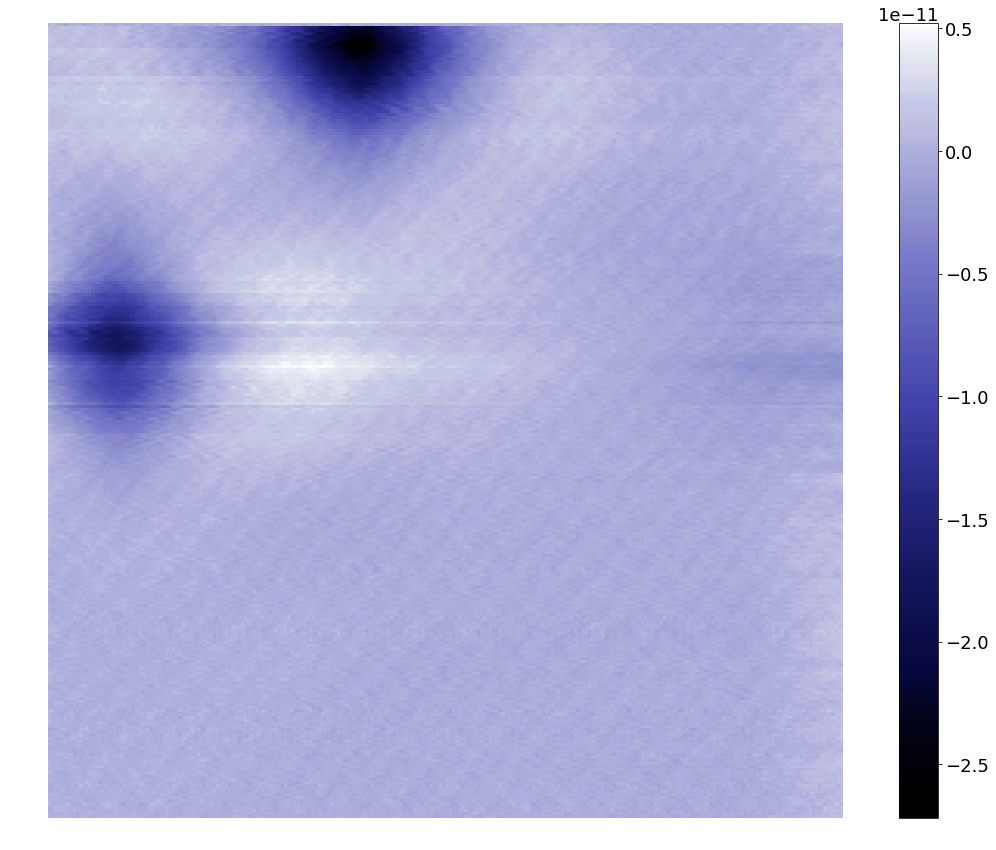

In [13]:
figsize(16,12)
imshow(stmpy.tools.lineSubtract(output,maskon=True), rasterized=True,cmap=stmpy.cm.blue2)
tight_layout()
# gray()
axis('off')
colorbar()

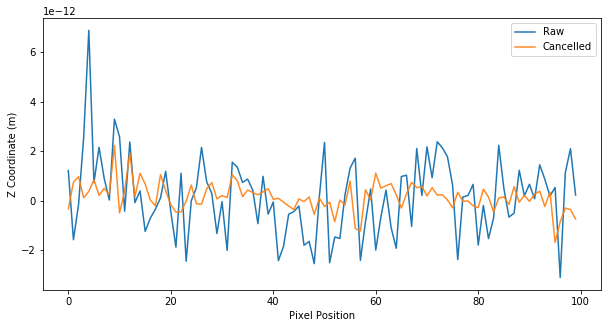

In [86]:
# lin=119
# lin=113
lin=120
plot(stmpy.tools.lineSubtract(raw)[1:101,lin], label='Raw')
plot(stmpy.tools.lineSubtract(output)[1:101,lin], alpha=0.9, label='Cancelled')
# plot(stmpy.tools.lineSubtract(img)[:100,128], label='SXM', alpha=0.7)
legend()
xlabel('Pixel Position')
ylabel('Z Coordinate (m)')
figsize(10,5)

In [53]:
dat_size[80:101,lin]

array([97., 97., 96., 97., 95., 97., 96., 97., 97., 95., 97., 96., 98.,
       96., 98., 98., 95., 98.,  0., 98., 96.])

Text(0, 0.5, 'Z Coordinate (m)')

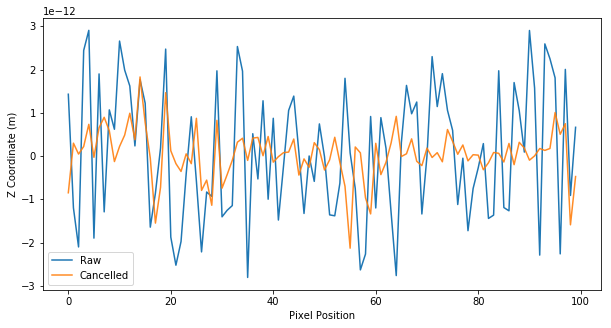

In [120]:
# lin=119
lin=114
figsize(10,5)
plot(stmpy.tools.lineSubtract(raw)[1:101,lin], label='Raw')
plot(stmpy.tools.lineSubtract(output)[1:101,lin], alpha=0.9, label='Cancelled')
# plot(stmpy.tools.lineSubtract(img)[:100,128], label='SXM', alpha=0.7)
legend()
xlabel('Pixel Position')
ylabel('Z Coordinate (m)')

In [18]:
read = stmpy.load("D:/Albert Chien/Google Drive/Vibration Project/Python Code/STMDATA/2019-02-25/2019-02-25_CeSb_00023.sxm")
img = read.channels['Z_Fwd']
img_b = read.channels['Z_Bkd']

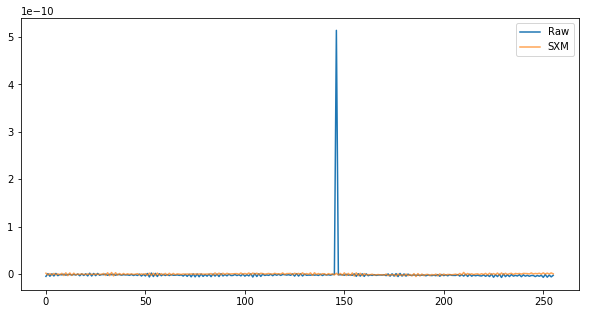

In [19]:
plot(stmpy.tools.lineSubtract(raw)[8,:], label='Raw')
# plot(stmpy.tools.lineSubtract(output)[128,:100], alpha=0.7, label='Cancelled')
plot(stmpy.tools.lineSubtract(img)[9,:], label='SXM', alpha=0.7)
legend()

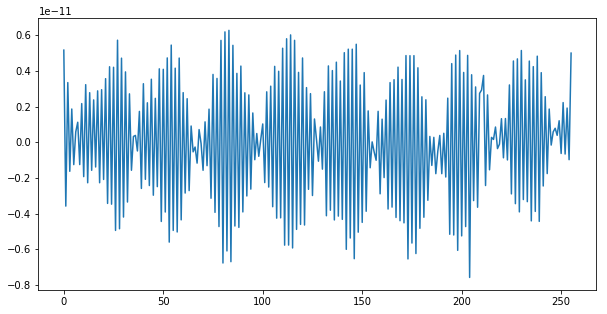

In [42]:
a=210
plot(stmpy.tools.lineSubtract(raw)[a,:], label='Raw')

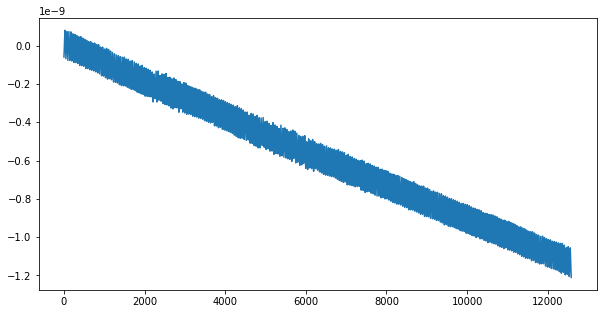

In [43]:
plot(z[::1000])

In [95]:
folder_name='../STMDATA/2019-02-25/'
file_name='noisy_cur_2_10khz-'
i = 1
temp_data = np.loadtxt(folder_name+file_name+"%(number)03d"%{"number": i}+".dat", skiprows=137)
# os.remove(folder_name+date_string+file_name+"%(number)03d"%{"number": i}+".dat")
while True:
    i += 1
    try:
        temp_data = np.concatenate((temp_data, np.loadtxt(folder_name+file_name+"%(number)03d"%{"number": i}+".dat", skiprows=137)))
        # os.remove(folder_name+date_string+file_name+"%(number)03d"%{"number": i}+".dat")
    except:
        break

In [96]:
current = temp_data[:,0]
geophone = temp_data[:,2]

array([-1.63135398e+10, -2.18736484e+01])

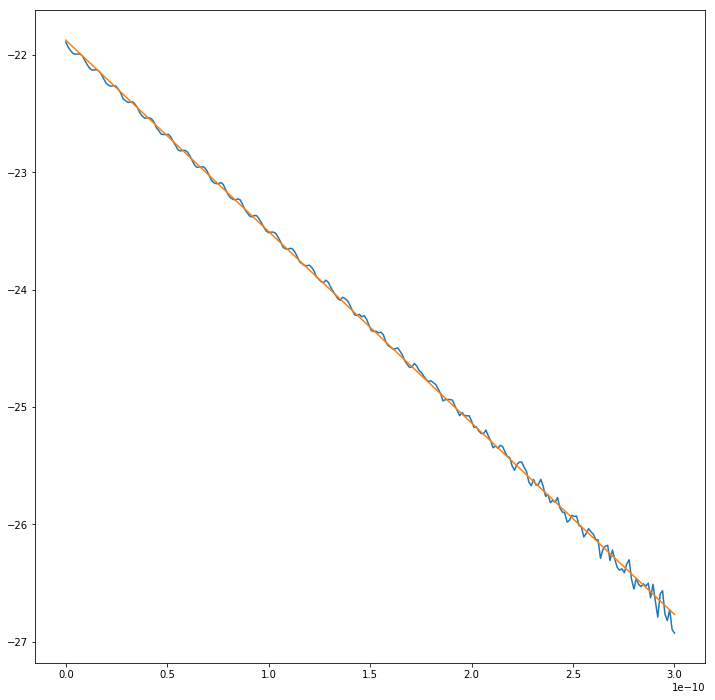

In [97]:
# load data

file_name = "Z-Spectroscopy-noisy001.dat"
folder_name = "../STMDATA/2019-02-25/"

z_spec = np.loadtxt(folder_name+file_name, skiprows=62)
z_spec_cur = z_spec[:,1]
z_spec_z = z_spec[:,0]
plot(z_spec_z,log(z_spec_cur))
fit = polyfit(z_spec_z,log(z_spec_cur),1)
plot(z_spec_z,fit[0]*z_spec_z+fit[1])
fit

In [108]:
cur_noise = exp(-(create_drive(geophone, 1/10000, transf,freqs))*fit[0])
cur_cancel = current/cur_noise*mean(cur_noise)

C:\Users\Albert Chien\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
C:\Users\Albert Chien\AppData\Roaming\Python\Python36\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


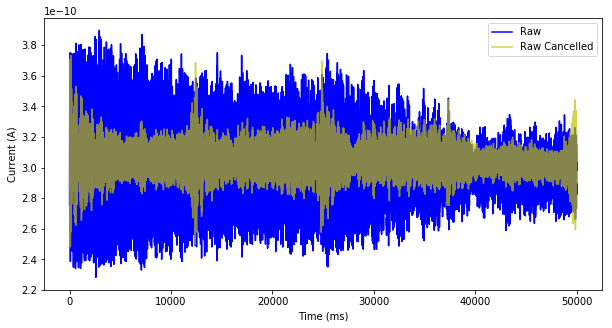

In [124]:
start = 0
a = 100000
figsize(10,5)
t=linspace(start,(a-start)/2,a/5)

plot(t,current[start:a:5], 'b', label='Raw')
plot(t,cur_cancel[start:a:5], 'y', label='Raw Cancelled', alpha=0.7)
xlabel('Time (ms)')
ylabel('Current (A)')
legend()

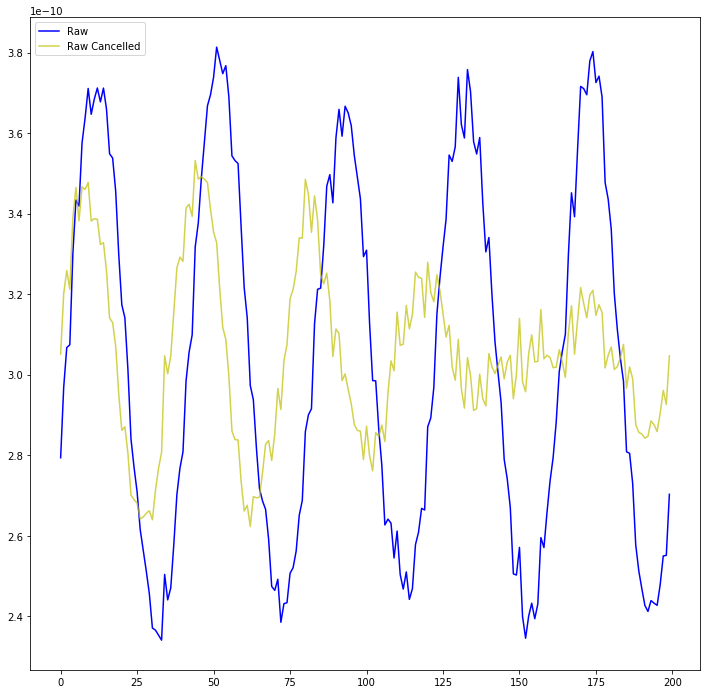

In [109]:
start = 1000
a = 2000
skip=5

plot(current[start:a:skip], 'b', label='Raw')
plot(cur_cancel[start:a:skip], 'y', label='Raw Cancelled', alpha=0.7)
legend()

In [14]:
folder_name='../STMDATA/2019-02-25/'
file_name='noisy_cur_10khz-'
i = 1
lockin_data = np.loadtxt(folder_name+file_name+"%(number)03d"%{"number": i}+".dat", skiprows=137)
# os.remove(folder_name+date_string+file_name+"%(number)03d"%{"number": i}+".dat")
while True:
    i += 1
    try:
        lockin_data = np.concatenate((lockin_data, np.loadtxt(folder_name+file_name+"%(number)03d"%{"number": i}+".dat", skiprows=137)))
        # os.remove(folder_name+date_string+file_name+"%(number)03d"%{"number": i}+".dat")
    except:
        break

In [15]:
lockin_cur = lockin_data[:,0]
lockin_g = lockin_data[:,2]
lockin_ref = lockin_data[:,1]
liy = lockin_data[:,8]

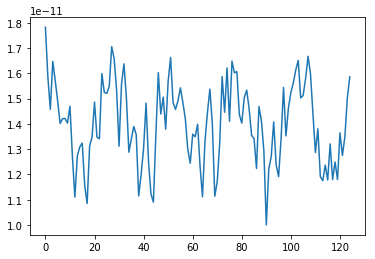

In [49]:
plot(liy[:1000:8])

In [25]:
liy[:20]

array([1.78198e-11, 1.78198e-11, 1.78198e-11, 1.78198e-11, 1.78198e-11,
       1.78198e-11, 1.68371e-11, 1.58543e-11, 1.58543e-11, 1.58543e-11,
       1.58543e-11, 1.58543e-11, 1.58543e-11, 1.58543e-11, 1.52150e-11,
       1.45757e-11, 1.45757e-11, 1.45757e-11, 1.45757e-11, 1.45757e-11])

In [116]:
off = 2
liy_calc = sum((lockin_cur[:-off]*(lockin_ref[off:]/500+0.5))[:8000].reshape(-1, 8), axis=1)/8

plot(liy_calc)

NameError: name 'lockin_cur' is not defined

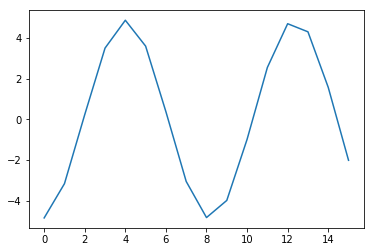

In [40]:
plot(lockin_ref[:16])

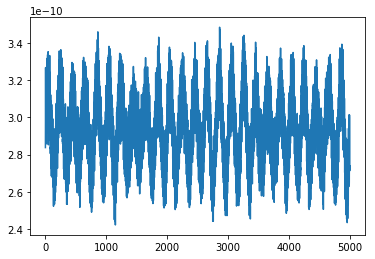

In [18]:
plot(lockin_cur[:5000])

In [19]:
lockin_cur_noise = exp(-(create_drive(lockin_g, 1/10000, transf,freqs))*fit[0])
lockin_cur_cancel = lockin_cur/lockin_cur_noise*mean(lockin_cur_noise)

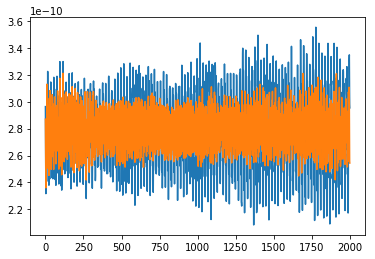

In [22]:
aran=250000
ran=270000
skip=10
plot(lockin_cur[aran:ran:skip])
plot(lockin_cur_cancel[aran:ran:skip])

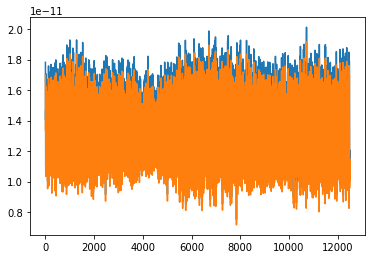

In [68]:
aran=0
ran=100000
skip=8
plot(liy[aran:ran:skip])
plot(liy[aran:ran:skip]/mean((lockin_cur_noise/mean(lockin_cur_noise))[:ran].reshape(-1, 8)))